In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "../data/transformed_london_merged.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,number_of_rentals,season,month,day,weekday,hour,is_holiday,is_weekend,temp_C,perceived_temp_C,humidity_percent,wind_speed_kmh,weather_code
0,182,3,1,4,6,0,0,1,3.0,2.0,93.0,6.0,3
1,138,3,1,4,6,1,0,1,3.0,2.5,93.0,5.0,1
2,134,3,1,4,6,2,0,1,2.5,2.5,96.5,0.0,1
3,72,3,1,4,6,3,0,1,2.0,2.0,100.0,0.0,1
4,47,3,1,4,6,4,0,1,2.0,0.0,93.0,6.5,1


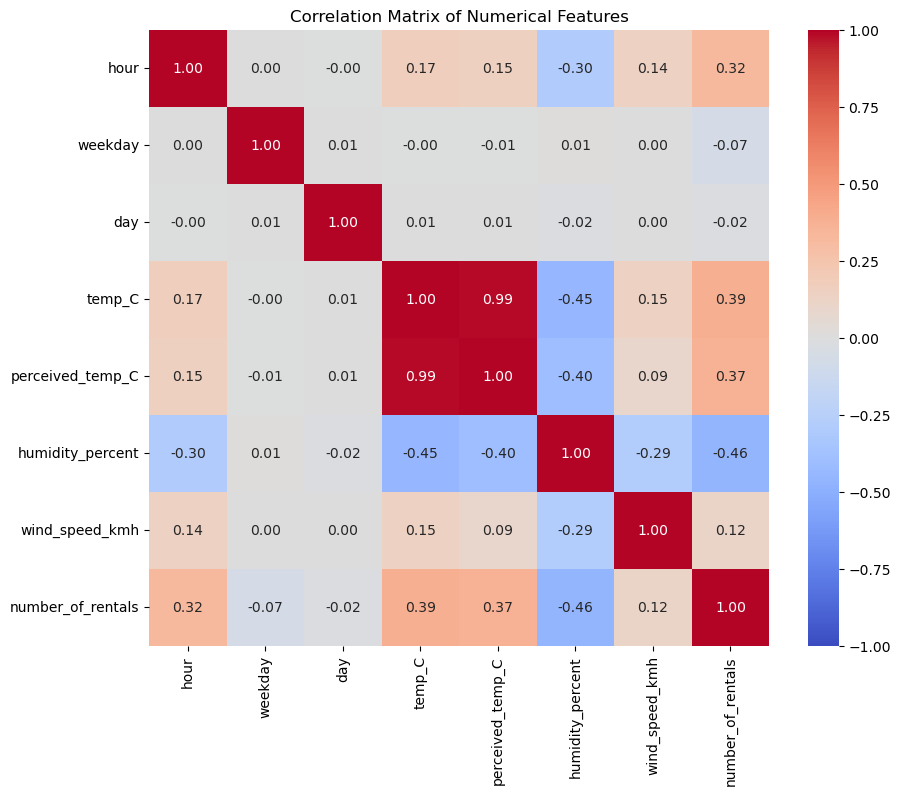

In [12]:
# Korelacja między zmiennymi liczbowymi
numerical_cols = ["hour", "weekday", "day", "temp_C", "perceived_temp_C", "humidity_percent", "wind_speed_kmh", "number_of_rentals"]
corr_matrix = df[numerical_cols].corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


# Remove poorly correlated numerical features and reduce number of strongly correlated features

In [13]:
# Also, we will remove all features which absolute correlations are < 0.1
correlation_threshold = 0.1
irrelevant_features = corr_matrix["number_of_rentals"].apply(abs) < correlation_threshold

# Lista cech do usunięcia
features_to_remove = irrelevant_features[irrelevant_features].index.tolist()


# Also, since temp and perceived_temp are directly correlated, we need to remove one of them - temperature is easier to measure, so we will remove the perceived temp.
features_to_remove.append('perceived_temp_C')

In [14]:
df = df.drop(columns=features_to_remove)

# Remove irrelevant categorical features

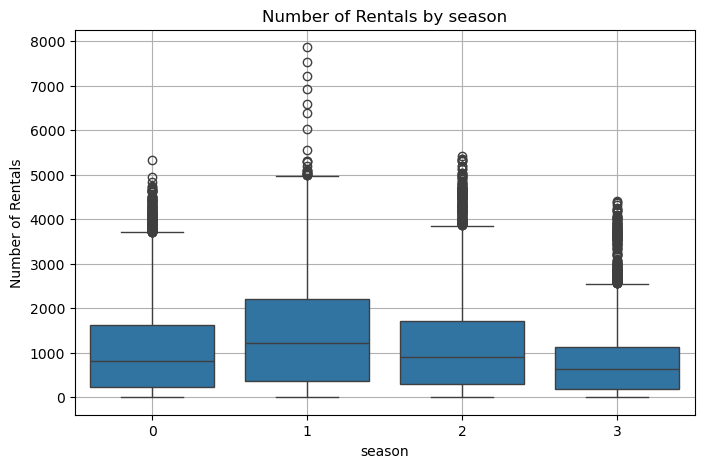

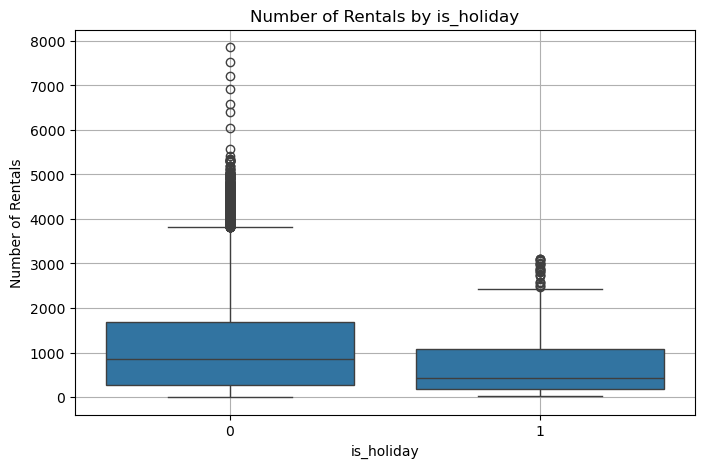

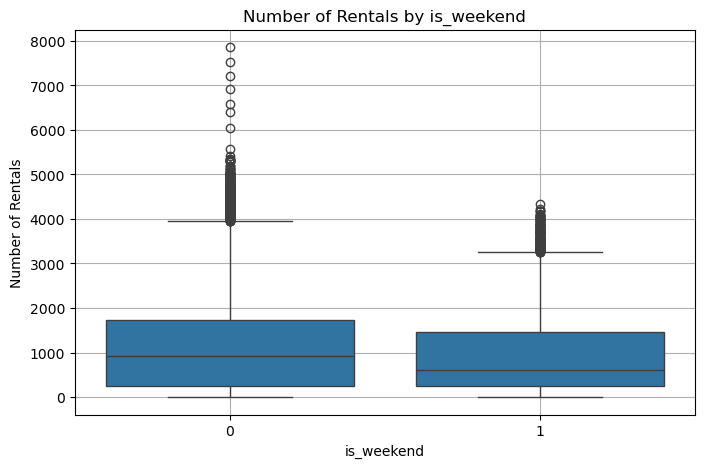

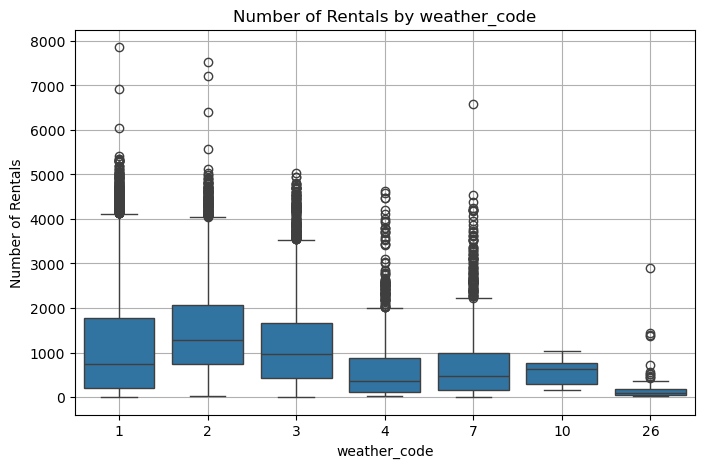

In [15]:
# Lista cech kategorycznych
categorical_cols = ["season", "is_holiday", "is_weekend", "weather_code"]

# Wizualizacja relacji między cechami kategorycznymi a targetem
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, y="number_of_rentals", data=df)
    plt.title(f"Number of Rentals by {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Rentals")
    plt.grid()
    plt.show()


In [16]:
from scipy.stats import f_oneway

# Test ANOVA dla każdej cechy kategorycznej
for col in categorical_cols:
    groups = [df[df[col] == cat]["number_of_rentals"] for cat in df[col].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"ANOVA for {col}: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")


ANOVA for season: F-statistic = 270.33, p-value = 0.0000
ANOVA for is_holiday: F-statistic = 46.66, p-value = 0.0000
ANOVA for is_weekend: F-statistic = 163.67, p-value = 0.0000
ANOVA for weather_code: F-statistic = 202.96, p-value = 0.0000


# NOTE: FOR NOW, we will not remove any of the categorical features

# LAST STEP - SAVE DATAFRAME

In [17]:
df.head()

,number_of_rentals,season,month,hour,is_holiday,is_weekend,temp_C,humidity_percent,wind_speed_kmh,weather_code
0,182,3,1,0,0,1,3.0,93.0,6.0,3
1,138,3,1,1,0,1,3.0,93.0,5.0,1
2,134,3,1,2,0,1,2.5,96.5,0.0,1
3,72,3,1,3,0,1,2.0,100.0,0.0,1
4,47,3,1,4,0,1,2.0,93.0,6.5,1


In [18]:
# Save DataFrame as CSV
output_path = "../data/dataset.csv"
df.to_csv(output_path, index=False)
print(f"DataFrame saved to {output_path}")

DataFrame saved to ../data/dataset.csv
